# Data Exploration
some data exploration and figuring out some irregularities. 

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv(r"C:\Users\AzFar\Quora Duplicate Questions\data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Checking which columns contain misssing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
df.Married.unique() 

array(['No', 'Yes', nan], dtype=object)

In [8]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
#df.loc[df['Self_Employed'].notna()]

In [11]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
#df.loc[df['LoanAmount'].isna()]

In [14]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### Look at some basic statistics for numerical variables.

In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### How many applicants have a Credit_History? (Credit_History has value 1 for those who have a credit history and 0 otherwise)

In [22]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

### Is the ApplicantIncome distribution in line with your expectation? Similarly, what about CoapplicantIncome?

In [23]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

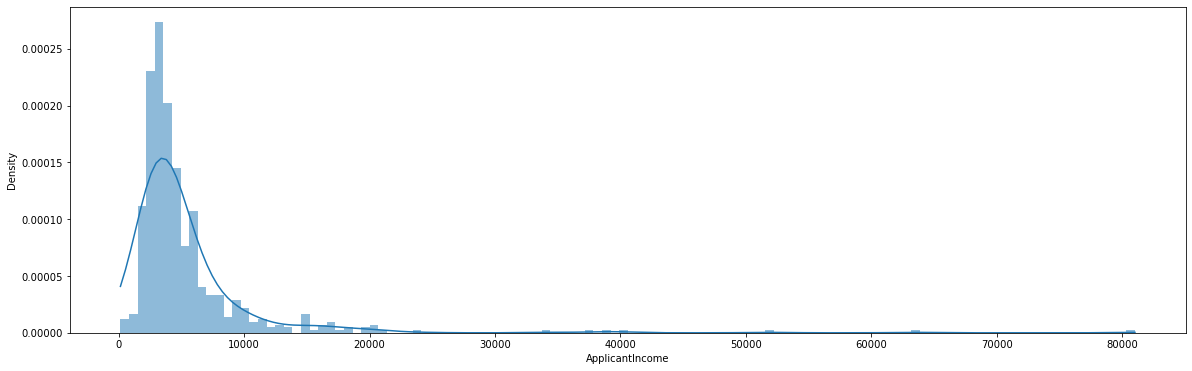

In [18]:
# histogram
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(df['ApplicantIncome'],kde=True, stat="density", linewidth=0)
plt.show()

### distribution above shows that there is a skewness in data and there are some outliers and the mean of applicant income is 5403$ and std 6109 shows that the majority of our customers have 10% income higher than average and are more likely to get approved to recieve a loan 

In [20]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

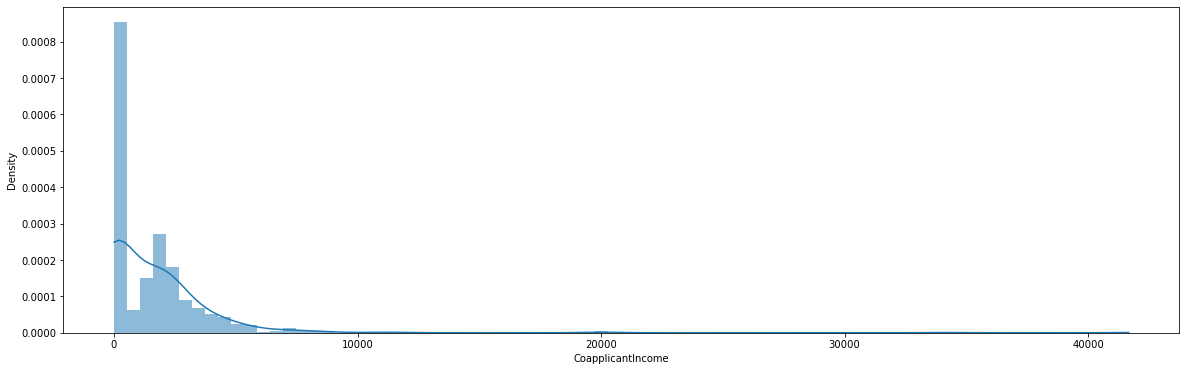

In [21]:
# histogram
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(df['CoapplicantIncome'],kde=True, stat="density", linewidth=0)
plt.show()

### Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [25]:
# Determine categorical variables
df_cat= df.select_dtypes(include=['object']).columns.tolist()
df_cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [26]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [27]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

### Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [29]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [30]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [31]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

### Distribution analysis
Studied distribution of various variables and Plotted the histogram of ApplicantIncome.

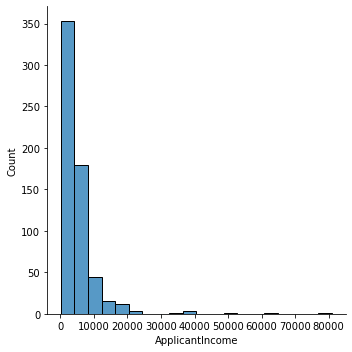

In [33]:
sns.displot(df, x="ApplicantIncome", bins=20)#[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,9000,10000])

### Looking at box plots to understand the distributions. 

<AxesSubplot:>

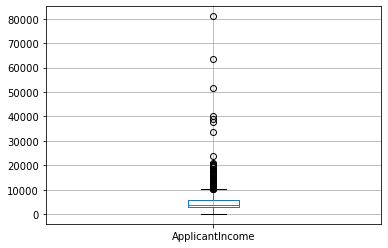

In [35]:
df.boxplot(column='ApplicantIncome',widths=0.15)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

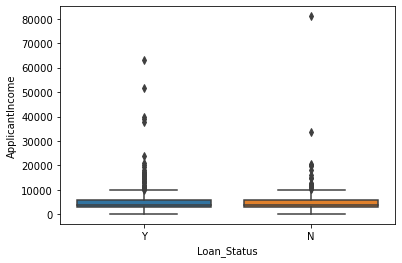

In [36]:
sns.boxplot(y='ApplicantIncome',x='Loan_Status', data=df)

### Looking at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

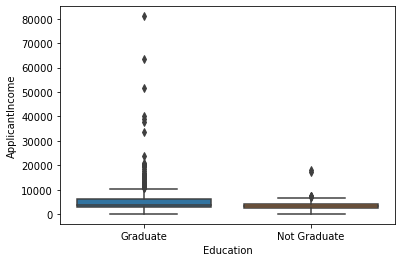

In [37]:
sns.boxplot(y='ApplicantIncome',x='Education', data=df)

### Looking at the histogram and boxplot of LoanAmount

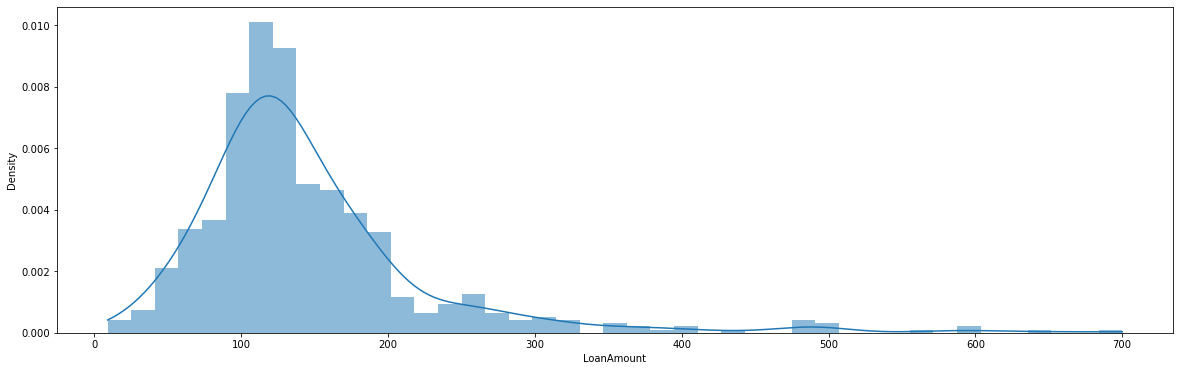

In [38]:
# histogram of LoanAmount
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(df['LoanAmount'],kde=True, stat="density", linewidth=0)
plt.show()

<AxesSubplot:ylabel='LoanAmount'>

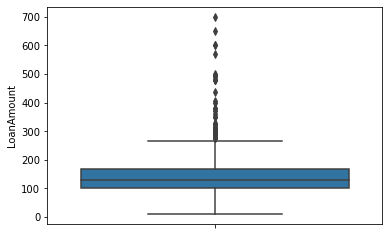

In [39]:
# Box Plot of LoanAmount
sns.boxplot(y='LoanAmount', data=df)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data mining. `LoanAmount` has missing and as well as extreme values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Tried to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [41]:
# looking at Gender column with pivot_table
Gender_table = pd.pivot_table(data=df,index=['Gender'])
Gender_table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Gender,,,,,
Female,4643.473214,1108.008929,0.831683,126.697248,352.293578
Male,5446.460123,1742.932352,0.847007,149.265957,339.665272


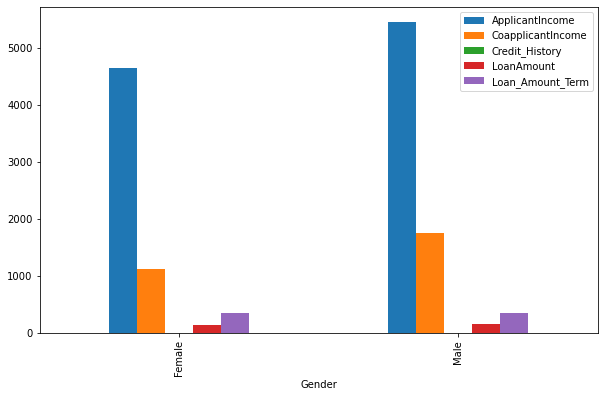

In [42]:
# visualizing gender based on pivot_table
plt.rcParams["figure.figsize"] = [10, 6]
Gender_table.plot(kind='bar').legend(loc='upper right')

In [43]:
# looking at Married column with pivot_table
Married_table = pd.pivot_table(data=df,index=['Married'])
Married_table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Married,,,,,
No,4970.384977,1316.558685,0.839196,128.883495,351.115385
Yes,5629.173367,1794.632965,0.842541,155.750000,336.987147


In [44]:
# looking at Property_Area with pivot_table
Property_Area = pd.pivot_table(data=df,index=['Property_Area'])
Property_Area

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Property_Area,,,,,
Rural,5554.083799,1645.536983,0.830303,152.260116,345.531429
Semiurban,5292.261803,1520.133047,0.861751,145.504386,347.113043
Urban,5398.247525,1716.350495,0.829670,142.198953,332.800000


<AxesSubplot:xlabel='Property_Area'>

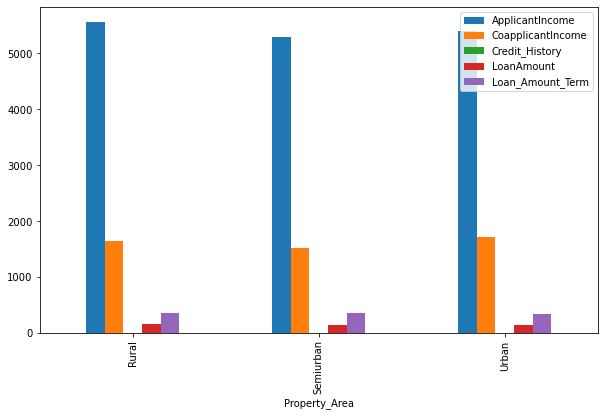

In [45]:
Property_Area.plot(kind='bar')